## Bayes' Theorem
Bayes' Theorem is a fundamental principle for updating probabilities based on new evidence. It's the mathematical foundation for learning from data.

**The Theorem:**

Bayes' theorem relates the conditional and marginal probabilities of random events. It is expressed as:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$
### Example
If $ P(B|A) = 0.8 $, $ P(A) = 0.5 $, and $ P(B) = 0.6 $, then
$$
P(A|B) = \frac{0.8 \cdot 0.5}{0.6} \approx 0.67.
$$

**Components:**
- **$P(A|B)$:** Posterior probability *(what we want to find)*
- **$P(B|A)$:** Likelihood *(probability of evidence given hypothesis)*
- **$P(A)$:** Prior probability *(initial belief before evidence)*
- **$P(B)$:** Evidence probability *(marginal likelihood)*



### 1. Update Cycle

In [2]:
"""Demonstrate the Bayesian update cycle"""

# Initial belief
prior_belief = 0.5  # Initially uncertain

# Collect evidence and update
evidence_sequence = [
    {'likelihood_if_true': 0.8, 'likelihood_if_false': 0.2},  # Strong positive
    {'likelihood_if_true': 0.6, 'likelihood_if_false': 0.4},  # Weak positive  
    {'likelihood_if_true': 0.3, 'likelihood_if_false': 0.7},  # Negative
]

current_belief = prior_belief
print("Bayesian Update Cycle:")
print(f"Prior belief: {current_belief:.3f}")

for i, evidence in enumerate(evidence_sequence, 1):
    # Calculate posterior
    numerator = evidence['likelihood_if_true'] * current_belief
    denominator = numerator + evidence['likelihood_if_false'] * (1 - current_belief)
    current_belief = numerator / denominator
    
    print(f"After evidence {i}: {current_belief:.3f}")

print(f"\nFinal posterior belief: {current_belief:.3f}")

Bayesian Update Cycle:
Prior belief: 0.500
After evidence 1: 0.800
After evidence 2: 0.857
After evidence 3: 0.720

Final posterior belief: 0.720


### 2. Conjugate Priors

In [3]:
from scipy.stats import beta, binom

# Beta-Binomial conjugate prior example
# Prior: Beta(α, β) distribution
alpha_prior, beta_prior = 2, 2  # Weak prior centered at 0.5

# Observe data: k successes in n trials
k_observed, n_observed = 8, 10  # 8 successes in 10 trials

# Posterior: Beta(α + k, β + n - k)
alpha_posterior = alpha_prior + k_observed
beta_posterior = beta_prior + (n_observed - k_observed)

print("Conjugate Priors Example (Beta-Binomial):")
print(f"Prior: Beta({alpha_prior}, {beta_prior})")
print(f"Data: {k_observed} successes in {n_observed} trials")
print(f"Posterior: Beta({alpha_posterior}, {beta_posterior})")
print(f"Prior mean: {alpha_prior/(alpha_prior + beta_prior):.3f}")
print(f"Posterior mean: {alpha_posterior/(alpha_posterior + beta_posterior):.3f}")

Conjugate Priors Example (Beta-Binomial):
Prior: Beta(2, 2)
Data: 8 successes in 10 trials
Posterior: Beta(10, 4)
Prior mean: 0.500
Posterior mean: 0.714


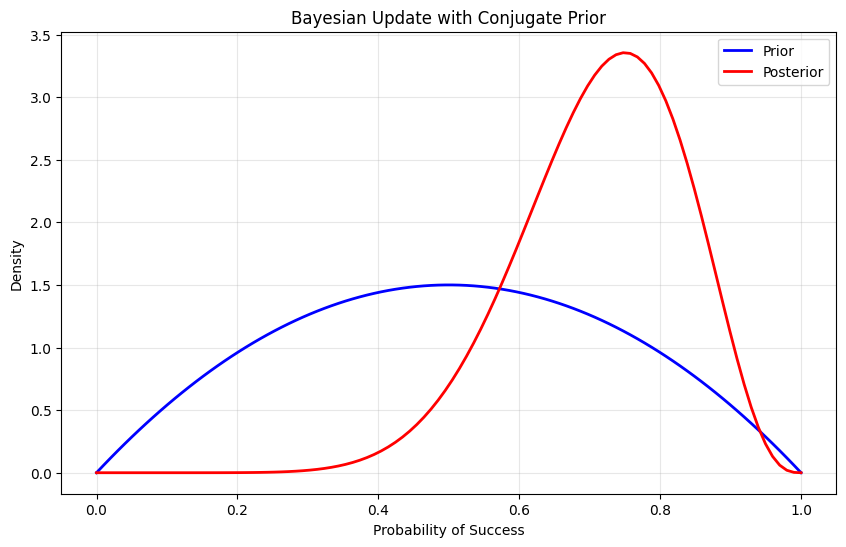

In [4]:
# Visualize
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_posterior, beta_posterior)

plt.figure(figsize=(10, 6))
plt.plot(x, prior_pdf, 'b-', label='Prior', linewidth=2)
plt.plot(x, posterior_pdf, 'r-', label='Posterior', linewidth=2)
plt.xlabel('Probability of Success')
plt.ylabel('Density')
plt.title('Bayesian Update with Conjugate Prior')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Why Bayes' Theorem is Fundamental**
- **Learning from Data:** Updates beliefs as new evidence arrives
- **Handles Uncertainty:** Provides probabilistic framework
- **Foundation for ML:** Naive Bayes, Bayesian Networks, MCMC
- **Decision Making:** Optimal decisions under uncertainty
- **Scientific Method:** Formalizes hypothesis testing and evidence accumulation

Bayes' Theorem transforms static probabilities into dynamic learning systems - that's why it's so powerful in data science and machine learning!

